#Keywords control with gready search

Adapted from Pascual et al. (2020). Code available on https://github.com/dapascual/DirectedBeamSearch

##install libraries

In [ ]:
!pip install transformers fasttext bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 7.4 MB/s eta 0:00:00
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 21.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.5 MB/s eta 0:00:00
  C

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.de.300.vec.gz

--2023-12-18 17:17:51--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.de.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.14, 3.163.189.51, 3.163.189.96, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1278030050 (1.2G) [binary/octet-stream]
Saving to: ‘cc.de.300.vec.gz’

cc.de.300.vec.gz    100%[===================>]   1.19G  27.2MB/s    in 41s     

2023-12-18 17:18:33 (29.4 MB/s) - ‘cc.de.300.vec.gz’ saved [1278030050/1278030050]



In [ ]:
%%bash
mkdir treetagger
cd treetagger
# Download the tagger package for your system (PC-Linux, Mac OS-X, ARM64, ARMHF, ARM-Android, PPC64le-Linux).
wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/tree-tagger-linux-3.2.4.tar.gz
tar -xzvf tree-tagger-linux-3.2.4.tar.gz
# Download the tagging scripts into the same directory.
wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/tagger-scripts.tar.gz
gunzip tagger-scripts.tar.gz
# Download the installation script install-tagger.sh.
wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/install-tagger.sh
# Download the parameter files for the languages you want to process.
# list of all files (parameter files) https://cis.lmu.de/~schmid/tools/TreeTagger/#parfiles
wget https://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/data/german.par.gz
sh install-tagger.sh
cd ..
sudo pip install treetaggerwrapper


bin/
bin/train-tree-tagger
bin/separate-punctuation
bin/tree-tagger
bin/tree-tagger-flush
cmd/
cmd/lookup.perl
COPYRIGHT
doc/
doc/sigdat95.pdf
doc/nemlap94.pdf
FILES
README
Release-Notes

German parameter file installed.
Tagging scripts installed.
Path variables modified in tagging scripts.

You might want to add /content/treetagger/cmd and /content/treetagger/bin to the PATH variable so that you do not need to specify the full path to run the tagging scripts.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for treetaggerwrapper: filename=treetaggerwrapper-2.3-py3-none-any.whl size=40760 sha256=2e33de6cdbd3e2a7c51f08f627b183c803994dd956b5fc45c3829a2c309604d8
  Stored in directory: /root/.cache/pip/wheels/ea/d5/4b/a29ceaa48c687208c69a791394c02c8e432971a98d8e5fc9ca
Successfully built treetaggerwrapper


--2023-12-18 17:18:33--  https://cis.lmu.de/~schmid/tools/TreeTagger/data/tree-tagger-linux-3.2.4.tar.gz
Resolving cis.lmu.de (cis.lmu.de)... 129.187.148.72, 2001:4ca0:4f01::5
Connecting to cis.lmu.de (cis.lmu.de)|129.187.148.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1889240 (1.8M) [application/x-gzip]
Saving to: ‘tree-tagger-linux-3.2.4.tar.gz’

     0K .......... .......... .......... .......... ..........  2%  166K 11s
    50K .......... .......... .......... .......... ..........  5%  332K 8s
   100K .......... .......... .......... .......... ..........  8% 28.3M 5s
   150K .......... .......... .......... .......... .......... 10% 33.4M 4s
   200K .......... .......... .......... .......... .......... 13%  337K 4s
   250K .......... .......... .......... .......... .......... 16% 31.5M 3s
   300K .......... .......... .......... .......... .......... 18% 31.9M 3s
   350K .......... .......... .......... .......... .......... 21% 25.2M 2s
   400K

In [ ]:
import csv
import math
import random
import torch
import time
import  os
import numpy as np
import re
from sklearn.utils import shuffle
import transformers
from transformers import AutoTokenizer, pipeline,AutoModelWithLMHead
from google.colab import drive
import fasttext
from nltk.stem import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
import torch.nn.functional as F
from huggingface_hub import hf_hub_download
import treetaggerwrapper
import pandas as pd
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,accuracy_score, recall_score, precision_score,f1_score
import matplotlib.pyplot as plt
from bertopic import BERTopic
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
german_stop_words = set(stopwords.words('german'))

tagger = treetaggerwrapper.TreeTagger(TAGLANG='de',TAGDIR='treetagger/')
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/treetaggerwrapper.py:739: FutureWarning: Possible nested set at position 8
  punct2find_re = re.compile("([^ ])([[" + ALONEMARKS + "])",
/usr/local/lib/python3.10/dist-packages/treetaggerwrapper.py:2043: FutureWarning: Possible nested set at position 152
  DnsHostMatch_re = re.compile("(" + DnsHost_expression + ")",
/usr/local/lib/python3.10/dist-packages/treetaggerwrapper.py:2067: FutureWarning: Possible nested set at position 409
  UrlMatch_re = re.compile(UrlMatch_expression, re.VERBOSE | re.IGNORECASE)
/usr/local/lib/python3.10/dist-packages/treetaggerwrapper.py:2079: FutureWarning: Possible nested set at position 192
  EmailMatch_re = re.compile(EmailMatch_expression, re.VERBOSE | re.IGNORECASE)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Mounted at /content/drive


##Prepare functions

### convert sentiment

In [ ]:
def convert_sentiment(text):
  if text in["[negative]","NEGATIVE"]:
    return 0
  if text in ["[positive]","POSITIVE"]:
    return 1

def convert_to_sentiment(x):
  if x == 0:
    return "[negative]"
  if x==1:
    return "[positive]"

In [ ]:
def del_stop_words(text):
  #delete stopwords
  words = nltk.word_tokenize(text)
  filtered_words = [word for word in words if word.lower() not in german_stop_words]
  return' '.join(filtered_words)

In [ ]:
def greedy_filtering(logits,  filter_value=-float('Inf')):

    top_k =1
    indices_to_remove = logits < torch.topk(logits, top_k)[0][..., -1, None]
    logits[indices_to_remove] = filter_value
    return logits

In [ ]:
def noguide(text, tokenizer, model, top_k=0, top_p=0.9, temperature=1.):
    """ Samples the next word of the sequence without logit modification (guidance)
        created by Pascual et al. (2020) https://github.com/dapascual/DirectedBeamSearch
    """
    ## GPT2 - generate logits
    indexed_tokens = tokenizer.encode(text)
    #indexed_this_seq = tokenizer.encode(this_sequence)
    tokens_tensor = torch.tensor([indexed_tokens])
    tokens_tensor = tokens_tensor.to('cuda')
    #model.to('cuda')

    # Predict all tokens
    outputs = model(tokens_tensor)
    del tokens_tensor
    torch.cuda.empty_cache()

    logits = outputs.logits
    logits = logits[0, -1, :]/ temperature
    proba = F.softmax(logits, dim=-1)

    logits = greedy_filtering(logits)
    logits = F.softmax(logits, dim=-1)
    predicted_index = torch.multinomial(logits, 1).item()

    predicted_text = tokenizer.decode(indexed_tokens + [predicted_index])
   # this_sequence = tokenizer.decode(indexed_this_seq + [predicted_index])
    pred_word = predicted_text.split()[-1]

    return predicted_text#, this_sequence

In [ ]:
def guidance(text, tokenizer, model, guide_word_lemma, fasttext_words, conv_table_gpt_vocab, weight, guide=False, temperature=1.):
    """ Samples the next word of the sequence with logit modification (guidance)
        adapted Pascual et al. (2020) https://github.com/dapascual/DirectedBeamSearch
    """
    ## GPT2 - generate logits

    indexed_tokens = tokenizer.encode(text)
    #indexed_this_seq = tokenizer.encode(this_sequence)
    tokens_tensor = torch.tensor([indexed_tokens])
    tokens_tensor = tokens_tensor.to('cuda')
    model.to('cuda')

    # Predict all tokens

    outputs = model(tokens_tensor)
    del tokens_tensor
    torch.cuda.empty_cache()
    logits = outputs.logits

    logits = logits[0, -1, :]/ temperature

    proba = F.softmax(logits, dim=-1)

    # Calculate cosine similarity
    logits_pro_guid_word=[]
    pred_indexes=[]
    for k,fasttext_word in zip(guide_word_lemma,fasttext_words):
      sim = cosine_similarity(np.reshape(
              fasttext_word, (1, -1)), conv_table_gpt_vocab)

      sim = np.clip(np.squeeze(sim), a_min=0, a_max=None)
      sim_squared = sim*sim     ###

      logits_temp = logits + torch.tensor(sim_squared*weight).cuda()

      logits_temp = greedy_filtering(logits_temp)

      logits_temp = F.softmax(logits_temp, dim=-1)

      predicted_index = torch.multinomial(logits_temp, 1).item() #sample from multinomial distribution

      logits_pro_guid_word.append(logits[predicted_index].item())

      pred_indexes.append(predicted_index)
    #select the token with the biggest probability
    predicted_index=pred_indexes[np.argmax(logits_pro_guid_word)]
    predicted_text = tokenizer.decode(indexed_tokens + [predicted_index])
    pred_word = predicted_text.split()[-1]
    pred_word_lemma=  tagger.tag_text(pred_word,tagonly=True)
    pred_word_lemma=[keyword.split('\t')[-1] for keyword in pred_word_lemma][0]
    #pred_word_stem = porter.stem(pred_word)


    if pred_word_lemma in guide_word_lemma:

        fasttext_words.pop(guide_word_lemma.index(pred_word_lemma))
        guide_word_lemma.remove(pred_word_lemma)

        if  guide_word_lemma==[]:
          guide = False
         # print("false")
    return predicted_text, guide, guide_word_lemma,fasttext_words

### Load FastText and models

In [ ]:
model_path = hf_hub_download(repo_id="facebook/fasttext-de-vectors", filename="model.bin")
model_fasttext = fasttext.load_model(model_path)


model.bin:   0%|          | 0.00/7.24G [00:00<?, ?B/s]

In [ ]:
#tokenizer_gpt = AutoTokenizer.from_pretrained("/content/drive/MyDrive/Masterthesis/Models/german_gpt2_sft_1_epoch_rl_1epochs")
#model_gpt = AutoModelWithLMHead.from_pretrained("/content/drive/MyDrive/Masterthesis/Models/german_gpt2_sft_1_epoch_rl_1epochs")
tokenizer_gpt = AutoTokenizer.from_pretrained("benjamin/gpt2-wechsel-german")
model_gpt = AutoModelWithLMHead.from_pretrained("benjamin/gpt2-wechsel-german")

tokenizer_config.json:   0%|          | 0.00/250 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/856k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/514k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.47M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/947 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/665M [00:00<?, ?B/s]

In [ ]:
tokenizer_for_perplex = AutoTokenizer.from_pretrained("distilbert-base-german-cased")
model_for_perplex = AutoModelWithLMHead.from_pretrained("distilbert-base-german-cased")

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/240k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/479k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/270M [00:00<?, ?B/s]


### Create vocabulary table




In [ ]:
vocab_size=len(tokenizer_gpt)
vocab_size

50257

In [ ]:
conv_table_gpt_vocab = np.zeros((vocab_size, 300))
for i in range(vocab_size):
        try:
            word = tokenizer_gpt.decode([i])
            word = word.strip().lower()
            fasttext = model_fasttext.get_word_vector(word)
            conv_table_gpt_vocab[i, :] = fasttext
        except:
            word = tokenizer_gpt.decode([i])
            conv_table_gpt_vocab[i, :] = np.zeros((300))

## Generetes text based on keyowrds list





In [ ]:
temperature=0.9
number_of_words_per_sentence = 100
df_keywords=pd.read_csv("/content/drive/MyDrive/Masterthesis/Data/keywords_list.tsv")

In [ ]:
df_top_k=pd.DataFrame(columns=["sentiment","text","gen_text","perplexity", "keywords", "num_keywords", "num_keywords_not_used"])
tagger = treetaggerwrapper.TreeTagger(TAGLANG='de',TAGDIR='treetagger/')
sentiment=False
for i in range(0,50):
  keywords=eval(df_keywords.loc[i,"keywords" ])#random.sample(words,3)
  keywords = tagger.tag_text(keywords,tagonly=True)
  keywords=[keyword.split('\t')[-1] for keyword in keywords]
  keywords_fasttext=[model_fasttext.get_word_vector(keyword) for keyword in keywords]


  if  sentiment==True:
      context=  df_keywords.loc[i,"sent" ]+ " Wir waren in diesem Hotel."#random.sample(sentiment,1)[0]
  else:
      context= " Wir waren in diesem Hotel."#random.sample(sentiment,1)[0]  weight=30
  weight=30
  context_cp=context
  current_keyword=0
  lenght_keywords=len(keywords)
  guide_next = True
  lenght_keywords=len(keywords)
  guide_word_lemma= tagger.tag_text(keywords,tagonly=True)
  guide_word_lemma=[keyword.split('\t')[-1] for keyword in guide_word_lemma]
  guide_word_lemma_cp=guide_word_lemma.copy()
  keywords_fasttext_cp=keywords_fasttext.copy()
  for j in range(number_of_words_per_sentence):
    if guide_next == True:
        #use guidance
        context, guide_next,guide_word_lemma,keywords_fasttext= guidance(context, tokenizer_gpt, model_gpt,
                                    guide_word_lemma,keywords_fasttext, conv_table_gpt_vocab, weight, guide_next)
    else:
        #no guidance
        context = noguide(context, tokenizer_gpt, model_gpt)

  #first sequence based evaluation
  generated_text=re.sub('\[.*?\]', '', context)
  tokenize_input = tokenizer_for_perplex.tokenize(generated_text)
  tensor_input = torch.tensor([tokenizer_for_perplex.convert_tokens_to_ids(tokenize_input)])
  loss, logits = model_for_perplex(tensor_input, labels=tensor_input)[:2]
  df_top_k.loc[i,"sentiment"]=df_keywords.loc[i,"sent" ]
  df_top_k.loc[i,"text"]=context
  df_top_k.loc[i,"gen_text"]=generated_text
  df_top_k.loc[i,"perplexity"]=math.exp(loss)
  df_top_k.loc[i,"keywords"]=guide_word_lemma_cp
  df_top_k.loc[i, "num_keywords"]=len(guide_word_lemma_cp)
  df_top_k.loc[i, "num_keywords_not_used"]=len(guide_word_lemma)
  #print(context, guide_word_lemma_cp,guide_word_lemma, math.exp(loss))


In [ ]:
df_top_k.to_csv('/content/drive/MyDrive/Masterthesis/Results/greedy_search_gpt_without_sentiment.tsv', sep="\t")
#df_top_k.to_csv('/content/drive/MyDrive/Masterthesis/Results/gready_search11.tsv', sep="\t")

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)

## sft 1 rl 1

In [ ]:
df_top_k11=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/gready_search11.tsv', sep="\t")

In [ ]:
df_top_k11=df_top_k11[~df_top_k11.index.isin([45,16,18,30,47])]

In [ ]:
df_top_k11["perplexity"].mean()

1.0946606149626972

In [ ]:
df_top_k11.groupby("sentiment").mean()["perplexity"]

sentiment
[negative]    1.099054
[positive]    1.088594
Name: perplexity, dtype: float64

In [ ]:
df_top_k11["num_keywords_used"]=df_top_k11["num_keywords"]-df_top_k11["num_keywords_not_used"]

In [ ]:
df_top_k11.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0    1.058830
1    1.133436
2    1.354737
3    1.097540
Name: perplexity, dtype: float64

In [ ]:
df_top_k11["succses_rate"]=df_top_k11["num_keywords_used"]/df_top_k11["num_keywords"]
df_top_k11["succses_rate"].mean()

0.6266666666666666

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_top_k11["sent_predicted_label"]=df_top_k11["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_top_k11["sentiment_conv"]=df_top_k11["sentiment"].apply(lambda x :convert_sentiment(x))
df_top_k11["sent_predicted_label_conv"]=df_top_k11["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

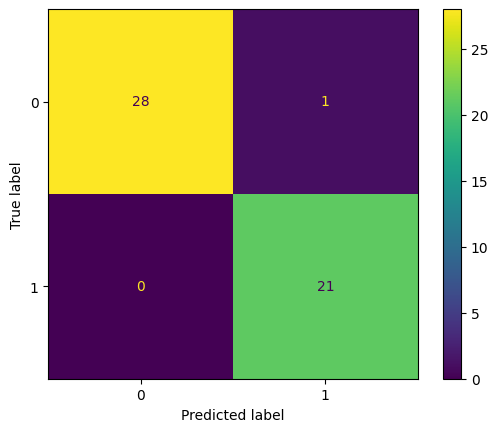

Accuracy: 0.98
Recall: [0.96551724 1.        ]
Precision: [1.         0.95454545]
F1: [0.98245614 0.97674419]


In [ ]:
y_test=df_top_k11["sentiment_conv"]
predicted=df_top_k11["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

In [ ]:
df_top_k11['text_del_stop_words']=df_top_k11['gen_text'].apply(del_stop_words)
docs = df_top_k11['text_del_stop_words']
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs)
topic_model.visualize_hierarchy()

In [ ]:
topic_model.get_topics()

{0: [('schlecht', 0.2322502888173919),
  ('unfreundlich', 0.1734683951216001),
  ('essen', 0.16036388235714258),
  ('gewechselt', 0.1271725616071867),
  ('personal', 0.1176033908802496),
  ('ungenießbar', 0.10672745412030708),
  ('klein', 0.10055156172647547),
  ('handtücher', 0.10043539434974919),
  ('frühstück', 0.09789792155639897),
  ('wurden', 0.09306800728132973)],
 1: [('zimmer', 0.23331050437281164),
  ('wasserkocher', 0.23118576567131952),
  ('sauber', 0.21215876416525883),
  ('hilfsbereit', 0.20756400835912267),
  ('immer', 0.1919440800484936),
  ('leistung', 0.18202724995134792),
  ('freundlich', 0.17138678861450035),
  ('personal', 0.16550531783066458),
  ('groß', 0.13903143462421733),
  ('gut', 0.12436105240158273)]}

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,27,0_schlecht_unfreundlich_essen_gewechselt,"[schlecht, unfreundlich, essen, gewechselt, pe...",[Hotel . Preis-Leistung gut . Handtuchhilfe Hi...
1,1,18,1_zimmer_wasserkocher_sauber_hilfsbereit,"[zimmer, wasserkocher, sauber, hilfsbereit, im...",[Hotel . Eindruckvoll sauber . Kaffee Tee Bade...


In [ ]:
topic_model.visualize_heatmap()

## sft 1 rl 2

In [ ]:
df_top_k12=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/gready_search12.tsv', sep="\t")

In [ ]:
df_top_k12.sort_values(by=["perplexity"],ascending=False).head()
df_top_k12=df_top_k12[~df_top_k12.index.isin([45,47,26,30])]

In [ ]:
df_top_k12["perplexity"].mean()

1.0926113626809293

In [ ]:
df_top_k12.groupby("sentiment").mean()["perplexity"]

sentiment
[negative]    1.099301
[positive]    1.082205
Name: perplexity, dtype: float64

In [ ]:
df_top_k12["num_keywords_used"]=df_top_k12["num_keywords"]-df_top_k12["num_keywords_not_used"]

In [ ]:
df_top_k12.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0    1.059794
1    1.056490
2    1.250113
3    1.110663
Name: perplexity, dtype: float64

In [ ]:
df_top_k12["succses_rate"]=df_top_k12["num_keywords_used"]/df_top_k12["num_keywords"]
df_top_k12["succses_rate"].mean()

0.5869565217391305

In [ ]:
df_top_k12["gen_text"]=df_top_k12["text"].apply(lambda x: re.sub(r'\[.*?\]', '', x))

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_top_k12["sent_predicted_label"]=df_top_k12["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_top_k12["sentiment_conv"]=df_top_k12["sentiment"].apply(lambda x :convert_sentiment(x))
df_top_k12["sent_predicted_label_conv"]=df_top_k12["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

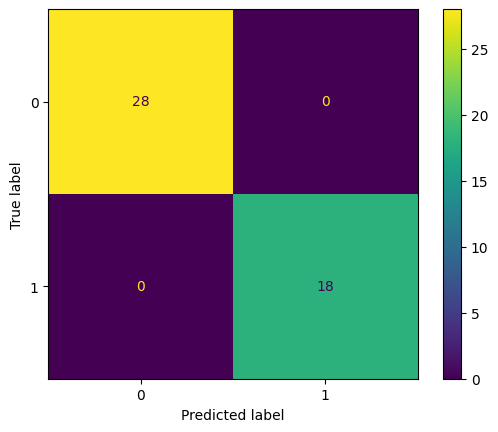

Accuracy: 1.0
Recall: [1. 1.]
Precision: [1. 1.]
F1: [1. 1.]


In [ ]:
y_test=df_top_k12["sentiment_conv"]
predicted=df_top_k12["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

In [ ]:
df_top_k12['text_del_stop_words']=df_top_k12['text'].apply(del_stop_words)
docs = df_top_k12['text_del_stop_words']
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs)
topic_model.visualize_hierarchy()

In [ ]:
topic_model.get_topics()

{-1: [('zimmer', 0.3578605272224115),
  ('richtig', 0.3064795555139035),
  ('gereinigt', 0.2789159540722124),
  ('wurden', 0.21254202197526448),
  ('hellhörig', 0.15390591370744197),
  ('sauber', 0.12123861914554723),
  ('klimaanlage', 0.12078868726673378),
  ('funktionierte', 0.11861755477082307),
  ('negative', 0.07438730990066396),
  ('hotel', 0.07262231608408048)],
 0: [('immer', 0.16817956263196335),
  ('zimmermädchen', 0.14147850146479352),
  ('gab', 0.12608485230917815),
  ('schlecht', 0.12346763317250382),
  ('unfreundlich', 0.12093502281628433),
  ('gleiche', 0.11122857018738383),
  ('essen', 0.10560912185612405),
  ('kalt', 0.09991329038638373),
  ('negative', 0.07944897870527416),
  ('zimmer', 0.07894851636270256)],
 1: [('sauber', 0.17430247853968528),
  ('gut', 0.1529374155131036),
  ('zimmer', 0.1489597632914386),
  ('hotel', 0.11682720413525992),
  ('abwechslungsreich', 0.10846127175183873),
  ('tag', 0.09922209439666638),
  ('hilfsbereit', 0.0986893721854594),
  ('schön

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,6,-1_zimmer_richtig_gereinigt_wurden,"[zimmer, richtig, gereinigt, wurden, hellhörig...",[[ negative ] Hotel . Hotel heruntergekommen ....
1,0,20,0_immer_zimmermädchen_gab_schlecht,"[immer, zimmermädchen, gab, schlecht, unfreund...",[[ negative ] Hotel . Essen einfach schlecht ....
2,1,20,1_sauber_gut_zimmer_hotel,"[sauber, gut, zimmer, hotel, abwechslungsreich...",[[ positive ] Hotel . Hotel schön sauber . Zim...


In [ ]:
topic_model.visualize_heatmap()

## sft 2 rl 1

In [ ]:
df_top_k21=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/gready_search21.tsv', sep="\t")

In [ ]:
df_top_k21["perplexity"].mean()

1.1537670452087425

In [ ]:
df_top_k21.groupby("sentiment").mean()["perplexity"]

sentiment
[negative]    1.140688
[positive]    1.171828
Name: perplexity, dtype: float64

In [ ]:
df_top_k21["num_keywords_used"]=df_top_k21["num_keywords"]-df_top_k21["num_keywords_not_used"]

In [ ]:
df_top_k21.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0    1.067480
1    1.660038
2    1.609715
3    1.108843
Name: perplexity, dtype: float64

In [ ]:
df_top_k21["succses_rate"]=df_top_k21["num_keywords_used"]/df_top_k21["num_keywords"]
df_top_k21["succses_rate"].mean()

0.5

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_top_k21["sent_predicted_label"]=df_top_k21["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_top_k21["sentiment_conv"]=df_top_k21["sentiment"].apply(lambda x :convert_sentiment(x))
df_top_k21["sent_predicted_label_conv"]=df_top_k21["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

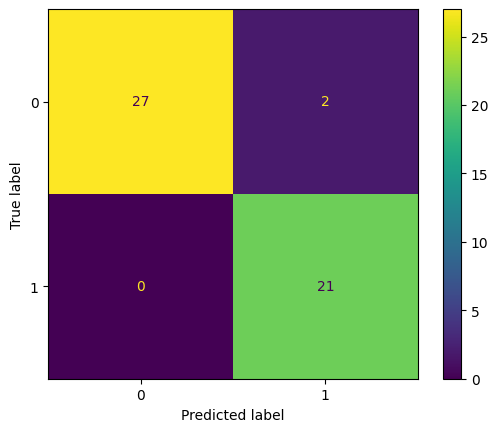

Accuracy: 0.96
Recall: [0.93103448 1.        ]
Precision: [1.         0.91304348]
F1: [0.96428571 0.95454545]


In [ ]:
y_test=df_top_k21["sentiment_conv"]
predicted=df_top_k21["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

In [ ]:
df_top_k21['text_del_stop_words']=df_top_k21['gen_text'].apply(del_stop_words)
docs = df_top_k21['text_del_stop_words']
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs)
#topic_model.visualize_hierarchy()

In [ ]:
topic_model.get_topics()

{0: [('zimmer', 0.22387089792996376),
  ('wurden', 0.16875071061002977),
  ('wasserkocher', 0.15396145976813028),
  ('gewechselt', 0.13935945870054764),
  ('gereinigt', 0.12205909866760777),
  ('sauber', 0.12054314475663183),
  ('hotel', 0.09767000578547747),
  ('bettwäsche', 0.09613884650274408),
  ('personal', 0.09613884650274408),
  ('wurde', 0.09438501486589995)],
 1: [('kissen', 0.3167482109506272),
  ('frühstück', 0.3091878254469882),
  ('gleiche', 0.28094447015952406),
  ('katastrophe', 0.265281072220615),
  ('gab', 0.20152579351481356),
  ('abendessen', 0.18840720392846724),
  ('essen', 0.1770335403259274),
  ('immer', 0.16978731349169088),
  ('gut', 0.14920835012316197),
  ('tag', 0.11317667639533877)]}

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,33,0_zimmer_wurden_wasserkocher_gewechselt,"[zimmer, wurden, wasserkocher, gewechselt, ger...",[Hotel . Essen gut . Personal unfreundlich . Z...
1,1,17,1_kissen_frühstück_gleiche_katastrophe,"[kissen, frühstück, gleiche, katastrophe, gab,...",[Hotel . Essen gut . Frühstück schlecht . Früh...


## sft 2 rl 2

In [ ]:
df_top_k22=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/gready_search22.tsv', sep="\t")

In [ ]:
df_top_k22["perplexity"].mean()

1.1419411299833784

In [ ]:
df_top_k22.groupby("sentiment").mean()["perplexity"]

sentiment
[negative]    1.182219
[positive]    1.086320
Name: perplexity, dtype: float64

In [ ]:
df_top_k22["num_keywords_used"]=df_top_k22["num_keywords"]-df_top_k22["num_keywords_not_used"]

In [ ]:
df_top_k22.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0    1.069944
1    1.485553
2    2.238167
3    1.115514
Name: perplexity, dtype: float64

In [ ]:
df_top_k22["succses_rate"]=df_top_k22["num_keywords_used"]/df_top_k22["num_keywords"]
df_top_k22["succses_rate"].mean()

0.5533333333333332

In [ ]:
df_top_k22["gen_text"]=df_top_k22["text"].apply(lambda x: re.sub(r'\[.*?\]', '', x))

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_top_k22["sent_predicted_label"]=df_top_k22["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_top_k22["sentiment_conv"]=df_top_k22["sentiment"].apply(lambda x :convert_sentiment(x))
df_top_k22["sent_predicted_label_conv"]=df_top_k22["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

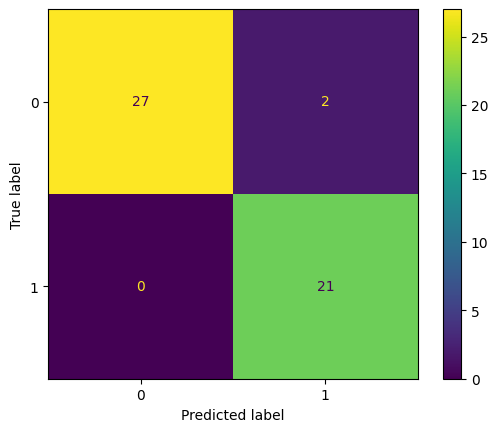

Accuracy: 0.96
Recall: [0.93103448 1.        ]
Precision: [1.         0.91304348]
F1: [0.96428571 0.95454545]


In [ ]:
y_test=df_top_k22["sentiment_conv"]
predicted=df_top_k22["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

In [ ]:
df_top_k22['text_del_stop_words']=df_top_k22['gen_text'].apply(del_stop_words)
docs = df_top_k22['text_del_stop_words']
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs)
#topic_model.visualize_hierarchy()

In [ ]:
topic_model.get_topics()

{-1: [('täglich', 0.1685263296665955),
  ('wurden', 0.15958147332458839),
  ('zimmer', 0.1561000653235821),
  ('gut', 0.15455539094242604),
  ('gereinigt', 0.15260219099196626),
  ('animation', 0.13429751949856084),
  ('kinderdisco', 0.12198884064861107),
  ('zumutung', 0.09016020458533038),
  ('gewechselt', 0.08943374655765178),
  ('hotel', 0.0728762506666359)],
 0: [('gab', 0.20853845955252384),
  ('sorte', 0.19939701827420117),
  ('immer', 0.17881668225805503),
  ('schlecht', 0.15385163024066484),
  ('essen', 0.14265831026633002),
  ('abendessen', 0.1397667570664575),
  ('frühstück', 0.13717145217916346),
  ('fleisch', 0.12969899487290934),
  ('gewürzt', 0.12015185257406095),
  ('katastrophe', 0.10845594699986429)],
 1: [('würstchen', 0.2665800005458165),
  ('sauber', 0.2645040140034232),
  ('zimmer', 0.2591532120838655),
  ('hotel', 0.17154086536440125),
  ('gekühlt', 0.13372694054099896),
  ('cocktails', 0.12591914667514423),
  ('ordentlich', 0.11789985931796458),
  ('immer', 0.10

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,24,-1_täglich_wurden_zimmer_gut,"[täglich, wurden, zimmer, gut, gereinigt, anim...",[Hotel . Personal freundlich hilfsbereit . Zim...
1,0,14,0_gab_sorte_immer_schlecht,"[gab, sorte, immer, schlecht, essen, abendesse...",[Hotel . Preis Leistung schlecht . Bett Bad dr...
2,1,12,1_würstchen_sauber_zimmer_hotel,"[würstchen, sauber, zimmer, hotel, gekühlt, co...",[Hotel . Zimmer groß Ausstattung gut . Zimmer ...


##GPT with sentiment token

In [ ]:
df_top_k_gpt=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/greedy_search_gpt.tsv', sep="\t")

In [ ]:
df_top_k_gpt.groupby("sentiment").mean()["perplexity"]

sentiment
[negative]    1.098521
[positive]    2.710230
Name: perplexity, dtype: float64

In [ ]:
df_top_k_gpt["perplexity"].mean()

1.7754387811419756

In [ ]:
df_top_k_gpt["num_keywords_used"]=df_top_k_gpt["num_keywords"]-df_top_k_gpt["num_keywords_not_used"]


In [ ]:
df_top_k_gpt.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0    1.078161
1    9.654287
3    1.093699
Name: perplexity, dtype: float64

In [ ]:
df_top_k_gpt["succses_rate"]=df_top_k_gpt["num_keywords_used"]/df_top_k_gpt["num_keywords"]
np.mean(df_top_k_gpt["succses_rate"])

0.7466666666666666

In [ ]:
df_top_k_gpt["gen_text"]=df_top_k_gpt["text"].apply(lambda x: re.sub(r'\[.*?\]', '', x))

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_top_k_gpt["sent_predicted_label"]=df_top_k_gpt["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_top_k_gpt["sentiment_conv"]=df_top_k_gpt["sentiment"].apply(lambda x :convert_sentiment(x))
df_top_k_gpt["sent_predicted_label_conv"]=df_top_k_gpt["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

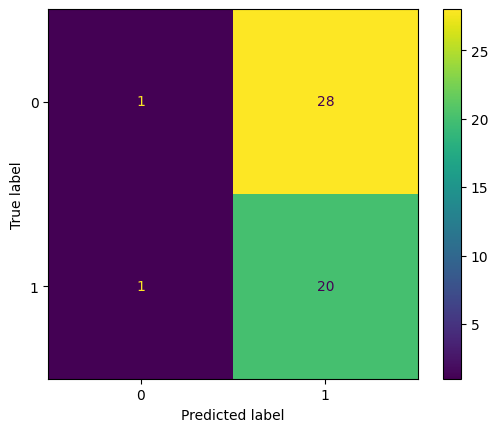

Accuracy: 0.42
Recall: [0.03448276 0.95238095]
Precision: [0.5        0.41666667]
F1: [0.06451613 0.57971014]


In [ ]:
y_test=df_top_k_gpt["sentiment_conv"]
predicted=df_top_k_gpt["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

In [ ]:
df_top_k_gpt['text_del_stop_words']=df_top_k_gpt['gen_text'].apply(del_stop_words)
docs = df_top_k_gpt['text_del_stop_words']
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs)


In [ ]:
topic_model.get_topics()

{-1: [('gut', 0.2646947080752793),
  ('sauber', 0.23925646690342156),
  ('zimmer', 0.20340749923341625),
  ('hotel', 0.18720380113747298),
  ('freundlich', 0.18061604462084632),
  ('frühstück', 0.1699048592881217),
  ('personal', 0.16890806289326732),
  ('wasserkocher', 0.15975191007359996),
  ('lage', 0.09981593282230578),
  ('handtuch', 0.09572126277590802)]}

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,50,-1_gut_sauber_zimmer_hotel,"[gut, sauber, zimmer, hotel, freundlich, frühs...",[Hotel . Preis-Leistung stimmt . Bett bequem W...


##GPT without sentiment token

In [ ]:
df_top_k_gpt=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/greedy_search_gpt_without_sentiment.tsv', sep="\t")

In [ ]:
df_top_k_gpt.groupby("sentiment").mean()["perplexity"]

sentiment
[negative]    1.097174
[positive]    2.705997
Name: perplexity, dtype: float64

In [ ]:
df_top_k_gpt["perplexity"].mean()

1.772879842602147

In [ ]:
df_top_k_gpt["num_keywords_used"]=df_top_k_gpt["num_keywords"]-df_top_k_gpt["num_keywords_not_used"]


In [ ]:
df_top_k_gpt.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0     1.072755
1    12.448994
3     1.096472
Name: perplexity, dtype: float64

In [ ]:
df_top_k_gpt["succses_rate"]=df_top_k_gpt["num_keywords_used"]/df_top_k_gpt["num_keywords"]
np.mean(df_top_k_gpt["succses_rate"])

0.76

In [ ]:
df_top_k_gpt["gen_text"]=df_top_k_gpt["text"].apply(lambda x: re.sub(r'\[.*?\]', '', x))

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_top_k_gpt["sent_predicted_label"]=df_top_k_gpt["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_top_k_gpt["sentiment_conv"]=df_top_k_gpt["sentiment"].apply(lambda x :convert_sentiment(x))
df_top_k_gpt["sent_predicted_label_conv"]=df_top_k_gpt["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

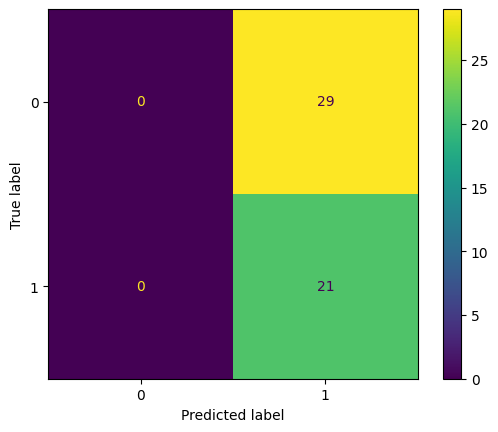

Accuracy: 0.42
Recall: [0. 1.]
Precision: [0.   0.42]
F1: [0.        0.5915493]


In [ ]:
y_test=df_top_k_gpt["sentiment_conv"]
predicted=df_top_k_gpt["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

In [ ]:
df_top_k_gpt['text_del_stop_words']=df_top_k_gpt['gen_text'].apply(del_stop_words)
docs = df_top_k_gpt['text_del_stop_words']
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs)


.gitattributes:   0%|          | 0.00/968 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.09k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/471M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

unigram.json:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
topic_model.get_topics()

In [ ]:
topic_model.get_topic_info()